In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E-commerce Dataset.csv')
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [60]:
df.describe()

,Order_Date,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,Year,Month,Day
count,51282,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.0,51282.000000,51282.000000
mean,2018-07-23 11:35:56.124956160,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166,2018.0,7.240533,15.517589
min,2018-01-01 00:00:00,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000,2018.0,1.000000,1.000000
25%,2018-05-07 00:00:00,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000,2018.0,5.000000,8.000000
50%,2018-07-28 00:00:00,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000,2018.0,7.000000,16.000000
75%,2018-10-17 00:00:00,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000,2018.0,10.000000,23.000000
max,2018-12-30 00:00:00,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000,2018.0,12.000000,30.000000
std,NaN,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685,0.0,3.230997,8.627786


Most of the sales are between 85 and 218 units.

More than half of the transactions involve between 1 and 4 units.

Most of the discounts range between 20% and 40%.

Sales and profit values are generally concentrated at or above the average, but there are some outliers.

Discount rates typically vary between 20% and 40%.

Shipping costs are generally low, but some high costs are observed.

In [5]:
df.isna().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Year,Month,Day
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018,1,2
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018,7,24
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018,11,8
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018,4,18
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018,8,13


1.Sales and Profit Analysis

Total Sales and Profit

Objective: Evaluate overall business performance

In [9]:
# Total Sales and Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

In [10]:
print(f'Total Sales: {total_sales}')
print(f'Total Profit: {total_profit}')

Total Sales: 7812164.0
Total Profit: 3610344.9000000004


In [11]:
# Monthly Total Sales and Profit
monthly_data = df.groupby(['Year', 'Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
monthly_data 

,Year,Month,Sales,Profit
0,2018,1,379627.0,174573.6
1,2018,2,332495.0,153288.2
2,2018,3,435502.0,200936.8
3,2018,4,596990.0,277646.2
4,2018,5,824362.0,379205.8
5,2018,6,642501.0,298246.1
6,2018,7,809974.0,374242.9
7,2018,8,664245.0,306771.5
8,2018,9,738303.0,341558.1
9,2018,10,743137.0,342228.5


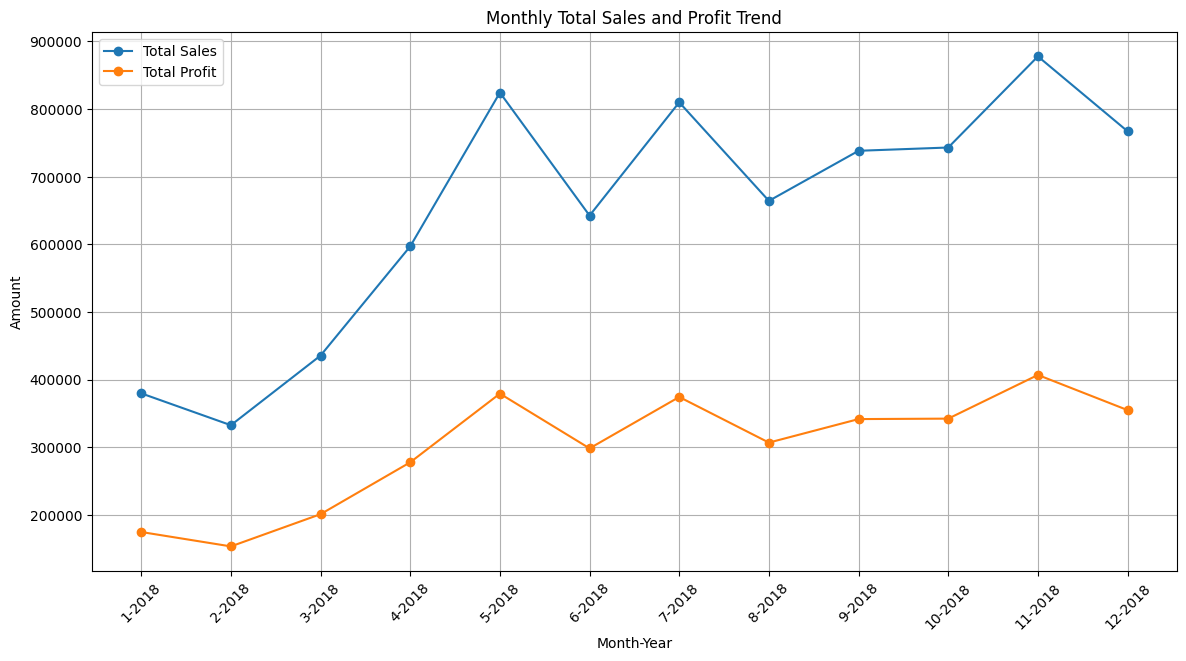

In [12]:
# Graph
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'].astype(str) + '-' + monthly_data['Year'].astype(str), monthly_data['Sales'], marker='o', label='Total Sales')
plt.plot(monthly_data['Month'].astype(str) + '-' + monthly_data['Year'].astype(str), monthly_data['Profit'], marker='o', label='Total Profit')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.title('Monthly Total Sales and Profit Trend')
plt.legend()
plt.grid()
plt.show()

The month with the highest total sales is November. 

The month with the highest profit is also November

b-Sales and Profit by Product and Category

Purpose: Understanding which products and categories are more profitable.

In [13]:
# Total Sales and Profit by Product
product_data = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
product_data

,Product,Sales,Profit
0,Apple Laptop,55250.0,33025.0
1,Bed Sheets,325151.0,172262.9
2,Beds,120276.0,53592.5
3,Bike Tyres,59400.0,26767.2
4,Car & Bike Care,97468.0,22700.3
5,Car Body Covers,96642.0,21629.9
6,Car Mat,44550.0,20782.8
7,Car Media Players,115500.0,39933.8
8,Car Pillow & Neck Rest,191268.0,107735.8
9,Car Seat Covers,94278.0,20006.9


In [14]:
# Total Sales and Profit by Category
category_data = df.groupby('Product_Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
category_data

,Product_Category,Sales,Profit
0,Auto & Accessories,1095681.0,483471.5
1,Electronic,394738.0,174190.6
2,Fashion,4345914.0,2072623.9
3,Home & Furniture,1975831.0,880058.9


In [15]:
# The top-selling  bottom-selling products and categories
top_products = product_data.sort_values(by='Sales', ascending=False).head(10)


top_products


,Product,Sales,Profit
35,T - Shirts,578336.0,340720.6
37,Titak watch,531468.0,296718.2
25,Running Shoes,522144.0,289097.6
19,Jeans,508376.0,276856.3
16,Formal Shoes,496503.0,265350.7
27,Shirts,457072.0,230078.3
17,Fossil Watch,370788.0,151271.7
38,Towels,351348.0,196828.2
30,Sofa Covers,332424.0,178920.5
1,Bed Sheets,325151.0,172262.9


In [16]:
#The bottom-selling products and categories
bottom_products = product_data.sort_values(by='Sales').head(10)
bottom_products

,Product,Sales,Profit
20,Keyboard,7293.0,3292.4
21,LCD,14560.0,6197.2
23,Mixer/Juicer,18592.0,5033.3
41,Watch,22984.0,3428.5
24,Mouse,24531.0,4632.8
15,Fans,32929.0,12047.7
32,Speakers,33930.0,9909.2
22,LED,43008.0,20910.0
36,Tablet,43979.0,22312.7
6,Car Mat,44550.0,20782.8


In [17]:
bottom_categories = category_data.sort_values(by='Sales').head(10)
bottom_categories

,Product_Category,Sales,Profit
1,Electronic,394738.0,174190.6
0,Auto & Accessories,1095681.0,483471.5
3,Home & Furniture,1975831.0,880058.9
2,Fashion,4345914.0,2072623.9


In [18]:
top_categories = category_data.sort_values(by='Sales', ascending=False).head(10)
top_categories



,Product_Category,Sales,Profit
2,Fashion,4345914.0,2072623.9
3,Home & Furniture,1975831.0,880058.9
0,Auto & Accessories,1095681.0,483471.5
1,Electronic,394738.0,174190.6


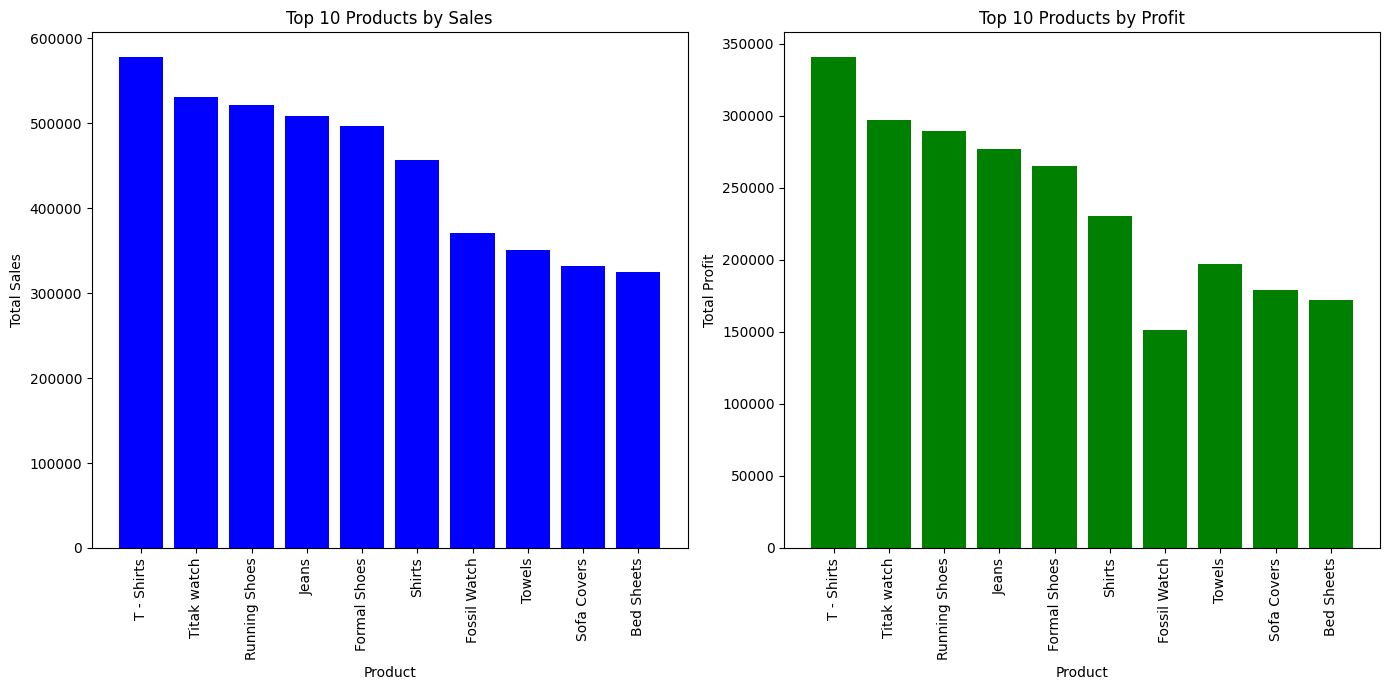

In [19]:
# product graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(top_products['Product'], top_products['Sales'], color='blue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.bar(top_products['Product'], top_products['Profit'], color='green')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Top 10 Products by Profit')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Best sales product t-shirt

The most profitable product is t-shirts

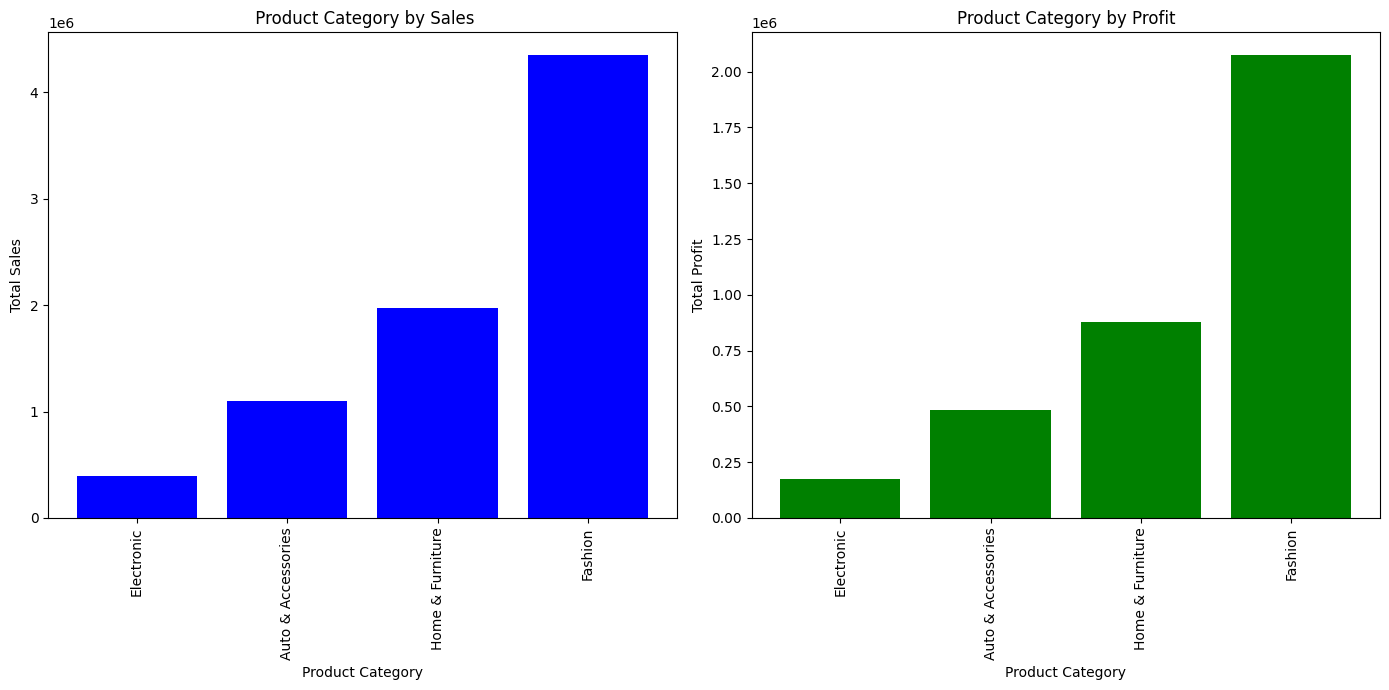

In [20]:
# Ürün bazında grafik
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(bottom_categories['Product_Category'], bottom_categories['Sales'], color='blue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title(' Product Category by Sales')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.bar(bottom_categories['Product_Category'], bottom_categories['Profit'], color='green')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Product Category by Profit')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The category with the highest sales: Fashion

The category with the highest profit: Fashion

Least sales category: Electronic

Least profit category: Electronic



2-Customer Analysis

a. Customer Segmentation

Purpose: To understand the shopping habits of different customer segments.

In [21]:
#  Customer Segmentation
segmentation_data = df.groupby(['Gender', 'Device_Type', 'Customer_Login_type']).agg({'Sales': 'sum', 'Profit': 'sum', 'Customer_Id': 'count'}).reset_index()
segmentation_data.columns = ['Gender', 'Device_Type', 'Customer_Login_type', 'Total_Sales', 'Total_Profit', 'Order_Count']
segmentation_data

,Gender,Device_Type,Customer_Login_type,Total_Sales,Total_Profit,Order_Count
0,Female,Mobile,First SignUp,1728.0,910.6,13
1,Female,Mobile,Guest,16409.0,7656.2,109
2,Female,Mobile,Member,245847.0,111393.2,1767
3,Female,Mobile,New,521.0,172.6,4
4,Female,Web,First SignUp,19842.0,8754.7,131
5,Female,Web,Guest,80247.0,37497.9,491
6,Female,Web,Member,3136046.0,1452168.9,20615
7,Female,Web,New,3482.0,1646.3,20
8,Male,Mobile,First SignUp,286.0,179.1,2
9,Male,Mobile,Guest,32401.0,15579.7,188


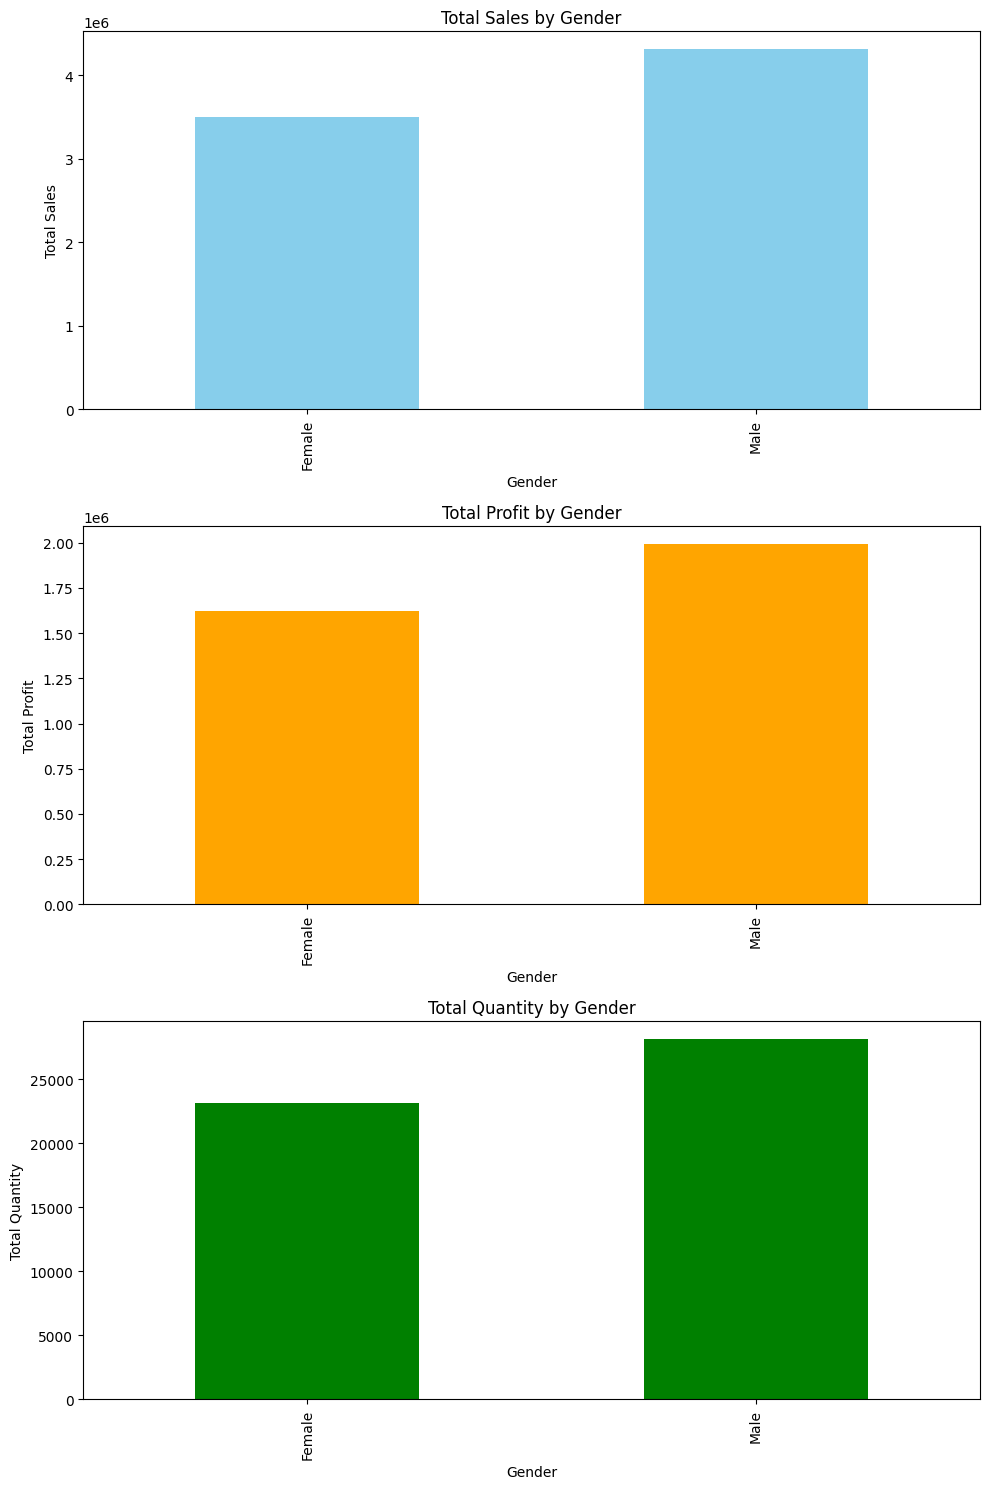

In [22]:
# Visualizing total sales, profits and orders for each segment
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Total sales visualization
segmentation_data.groupby(['Gender']).sum()['Total_Sales'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Sales')

# Total profit visualization
segmentation_data.groupby(['Gender']).sum()['Total_Profit'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Profit by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Total Profit')

#Total order count visualization
segmentation_data.groupby(['Gender']).sum()['Order_Count'].plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Total Quantity by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Total Quantity')

plt.tight_layout()
plt.show()

In [23]:
#Segmentation by gender and category
segmentation_data = df.groupby(['Gender', 'Product_Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

# Segmentation by subcategory
sub_category_segmentation_data = df.groupby(['Gender', 'Product_Category', 'Product']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

# result
print("Segmentation by gender and category:")
print(segmentation_data)

print("\nSegmentation by subcategory:")
print(sub_category_segmentation_data)

Segmentation by gender and category:
   Gender    Product_Category      Sales     Profit  Quantity
0  Female  Auto & Accessories   343025.0   152673.3    5360.0
1  Female          Electronic   216313.0    94930.5    3278.0
2  Female             Fashion  1923637.0   916936.5   31950.0
3  Female    Home & Furniture  1021147.0   455660.1   18466.0
4    Male  Auto & Accessories   752656.0   330798.2   12217.0
5    Male          Electronic   178425.0    79260.1    2673.0
6    Male             Fashion  2422277.0  1155687.4   34689.0
7    Male    Home & Furniture   954684.0   424398.8   19724.0

Segmentation by subcategory:
    Gender    Product_Category            Product     Sales   Profit  Quantity
0   Female  Auto & Accessories         Bike Tyres   18144.0   7665.6     580.0
1   Female  Auto & Accessories    Car & Bike Care   30444.0   7187.3     604.0
2   Female  Auto & Accessories    Car Body Covers   29718.0   6783.9     603.0
3   Female  Auto & Accessories            Car Mat   13986.0

<Figure size 1200x600 with 0 Axes>

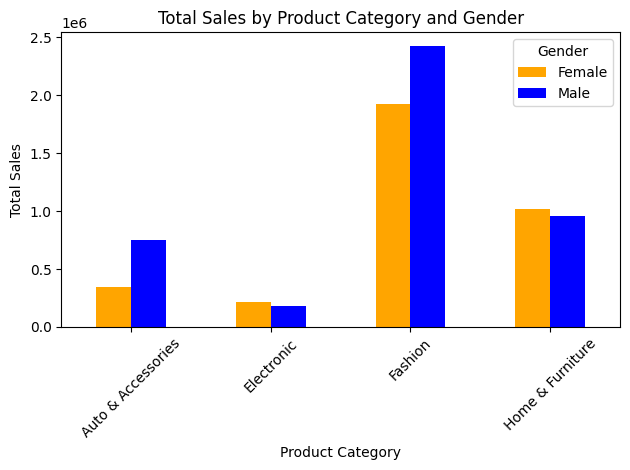

In [67]:
# Visualizing segmentation by gender and category
segmentation_data_pivot = segmentation_data.pivot_table(index='Product_Category', columns='Gender', values='Sales')


plt.figure(figsize=(12, 6))
segmentation_data_pivot.plot(kind='bar', color=['orange', 'blue'])
plt.title('Total Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Order and Distribution Analysis

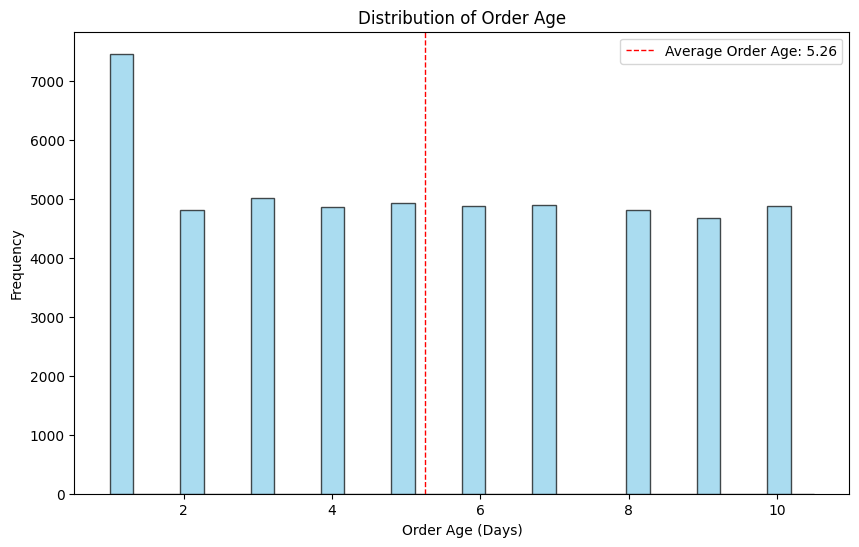

In [25]:
# Analyze the impact of order age on sales and customer satisfaction

average_aging = df['Aging'].mean()
# Visualizing order age
plt.figure(figsize=(10, 6))
plt.hist(df['Aging'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_aging, color='red', linestyle='dashed', linewidth=1, label=f'Average Order Age: {average_aging:.2f}')
plt.xlabel('Order Age (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Age')
plt.legend()
plt.show()


b. Order Priority and Delivery

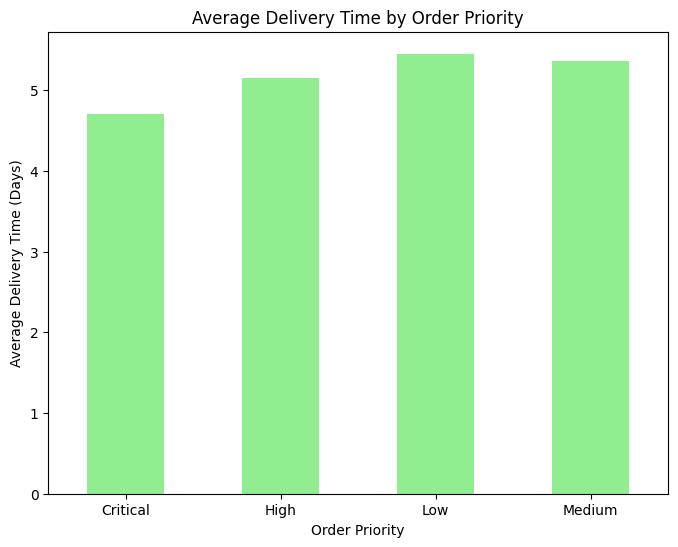

In [26]:
# Calculate delivery times based on order priority
priority_delivery = df.groupby('Order_Priority')['Aging'].mean()


# Visualize delivery times based on order priority
plt.figure(figsize=(8, 6))
priority_delivery.plot(kind='bar', color='lightgreen')
plt.xlabel('Order Priority')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time by Order Priority')
plt.xticks(rotation=0)
plt.show()

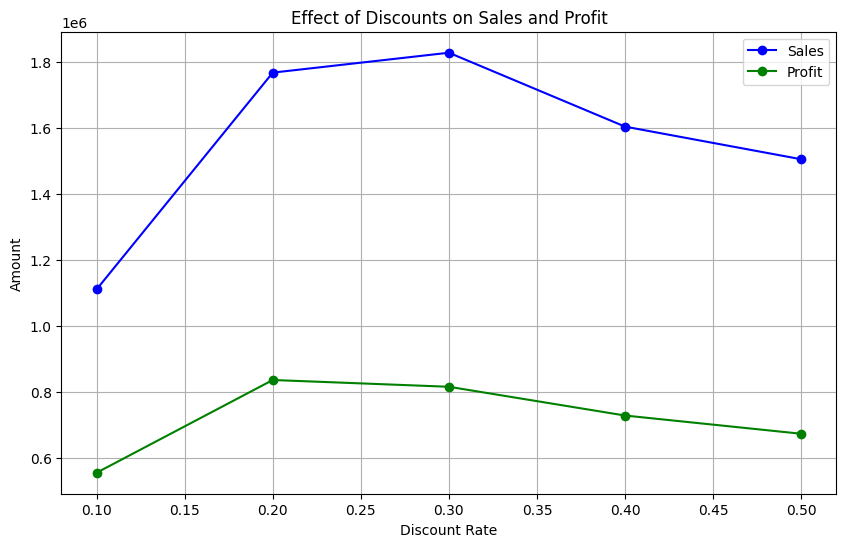

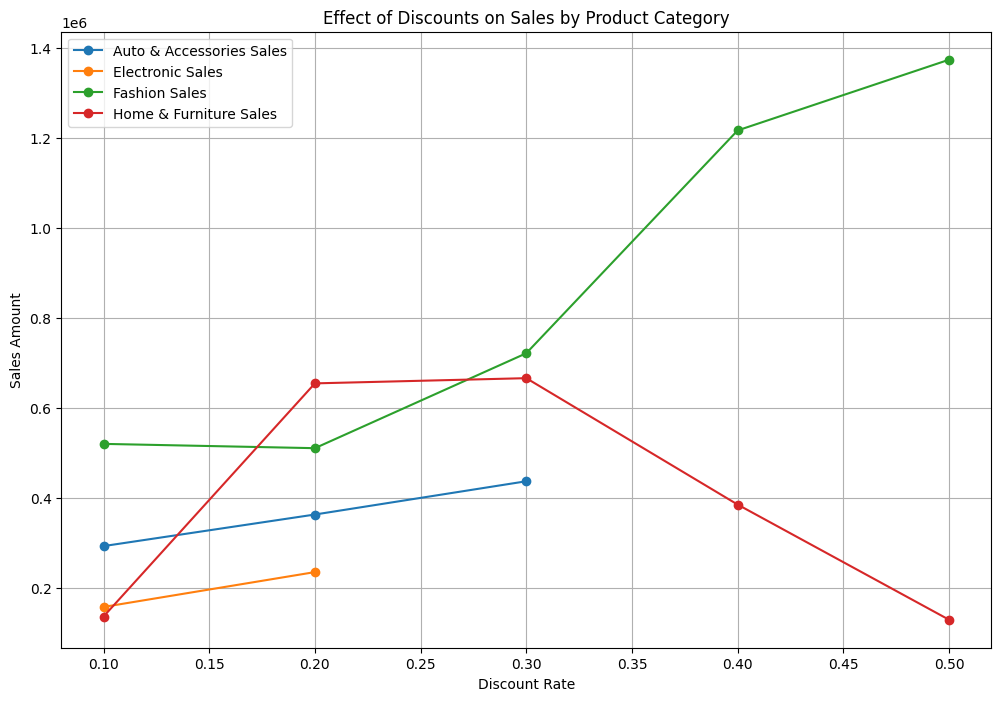

In [27]:
# Discount Analysis
# Analyzing the effect of discounts on sales and profit

# Calculate total sales and profit by discount rate
discount_analysis = df.groupby('Discount').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Visualize the effect of discounts on sales and profit
plt.figure(figsize=(10, 6))
plt.plot(discount_analysis['Discount'], discount_analysis['Sales'], marker='o', color='blue', label='Sales')
plt.plot(discount_analysis['Discount'], discount_analysis['Profit'], marker='o', color='green', label='Profit')
plt.xlabel('Discount Rate')
plt.ylabel('Amount')
plt.title('Effect of Discounts on Sales and Profit')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing the effect of discounts on different product categories
category_discount_analysis = df.groupby(['Product_Category', 'Discount']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Visualize the effect of discounts on different product categories
plt.figure(figsize=(12, 8))
for category in category_discount_analysis['Product_Category'].unique():
    category_data = category_discount_analysis[category_discount_analysis['Product_Category'] == category]
    plt.plot(category_data['Discount'], category_data['Sales'], marker='o', label=f'{category} Sales')
plt.xlabel('Discount Rate')
plt.ylabel('Sales Amount')
plt.title('Effect of Discounts on Sales by Product Category')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
payment_method = df['Payment_method'].value_counts()
payment_method

Payment_method
credit_card    38131
money_order     9628
e_wallet        2789
debit_card       733
not_defined        1
Name: count, dtype: int64

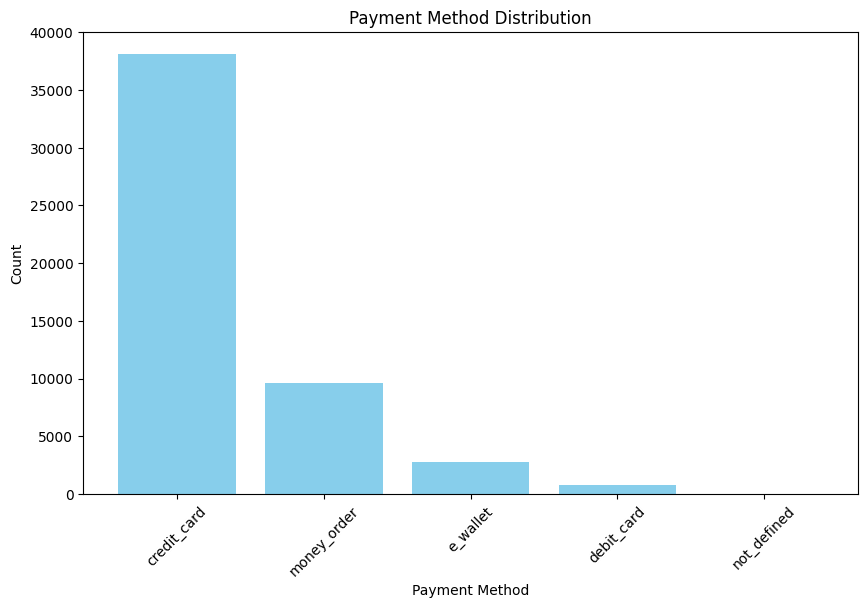

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(payment_method.index, payment_method, color='skyblue')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

Most payments were made by credit card

In [30]:
login_type_counts = df['Device_Type'].value_counts()
login_type_counts

Device_Type
Web       47624
Mobile     3658
Name: count, dtype: int64

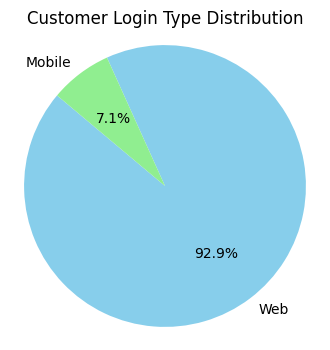

In [31]:
# pie graph
plt.figure(figsize=(4, 4))
plt.pie(login_type_counts, labels=login_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Customer Login Type Distribution')
plt.axis('equal')  
plt.show()

Examining whether there is statistical significance between sales and device type, payment method, gender, product category, order priority and product.

Relationship between sales and device type

<Axes: xlabel='Device_Type', ylabel='Sales'>

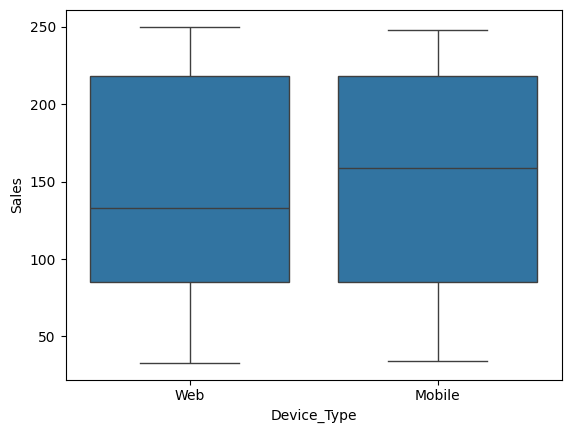

In [57]:

sns.boxplot(x='Device_Type', y='Sales',data=df)

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

To test the relationship between sales and device type, we can formulate the following hypotheses:

Null Hypothesis (H0): There is no significant difference in sales across different device types.

Alternative Hypothesis (H1): There is a significant difference in sales across different device types.


In [34]:
model = ols(formula = "Sales ~ C(Device_Type)" , data= df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.469
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.116
Time:                        15:19:09   Log-Likelihood:            -2.8800e+05
No. Observations:               51282   AIC:                         5.760e+05
Df Residuals:                   51280   BIC:                         5.760e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               154.0022      1.099    140.082      0.000     151.847     156.157
C(Device_Type)[T.Web]    -1.7927      1.141     -1.571      0.116      -4.029       0.443
==============================================================================
Omnibus:                   379401.221   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4494.392
Skew:                          -0.088   Prob(JB):                         0.00
Kurtosis:                       1.560   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic: F-statistic is used to test the significance of the model. Here, with a p-value of 0.116, it can be said that there is not strong evidence for the significance of the model.

coef (coefficients): Coefficients in the model represent the effects of independent variables on the dependent variable. For example, the "Intercept" coefficient is 154.0022, indicating that when the "Device_Type" variable is "Web", sales will decrease by 1.7927 units.

t (t-values): T-values are used to test the significance of coefficients. Here, for the "Device_Type" variable, the t-value is -1.571 and the p-value is 0.116, indicating that this variable does not have a significant effect on sales.



p value >0.05 and The null hypothesis was failed.These results indicate that the model is generally weak. Particularly, it can be concluded that the "Device_Type" variable does not have a significant effect on sales.



Relationship between sales and Payment method

<Axes: xlabel='Payment_method', ylabel='Sales'>

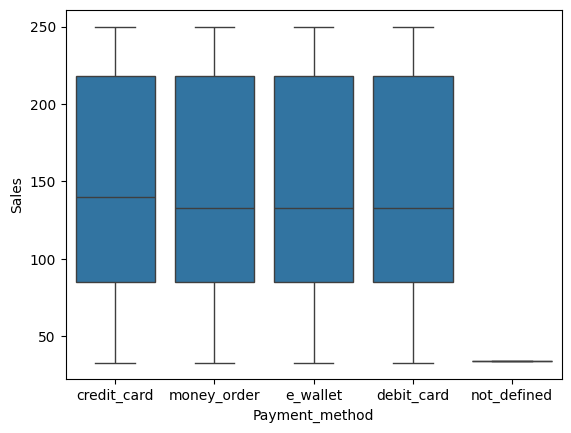

In [35]:
sns.boxplot(x='Payment_method', y='Sales',data=df)

H0: There is no significant difference in sales across different payment methods.

H1: There is a significant difference in sales across different payment methods.

In [36]:
model = ols(formula = "Sales ~ C(Payment_method)" , data= df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.504
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.198
Time:                        15:19:09   Log-Likelihood:            -2.8800e+05
No. Observations:               51282   AIC:                         5.760e+05
Df Residuals:                   51277   BIC:                         5.760e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          152.5953      0.341    448.143      0.000     151.928     153.263
C(Payment_method)[T.debit_card]     -2.8968      2.479     -1.168      0.243      -7.756       1.963
C(Payment_method)[T.e_wallet]       -1.0177      1.304     -0.780      0.435      -3.574       1.539
C(Payment_method)[T.money_order]    -0.8465      0.758     -1.116      0.264      -2.333       0.640
C(Payment_method)[T.not_defined]  -118.5953     66.492     -1.784      0.074    -248.920      11.730
==============================================================================
Omnibus:                   378820.185   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4496.434
Skew:                          -0.088   Prob(JB):                         0.00
Kurtosis:                       1.560   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic: Since the p-value associated with the F-statistic is 0.198, it can be said that there is not strong evidence for the significance of the model.

t (t-values): T-values are used to test the significance of coefficients. Here, for the "Payment_method" variable, the t-value for "debit_card" is -1.168 with a p-value of 0.243, indicating that this variable does not have a significant effect on sales.

These results indicate that the model is generally weak. Particularly, it can be concluded that the "Payment_method" variable does not have a significant effect on sales.

Relationship between sales and gender

<Axes: xlabel='Gender', ylabel='Sales'>

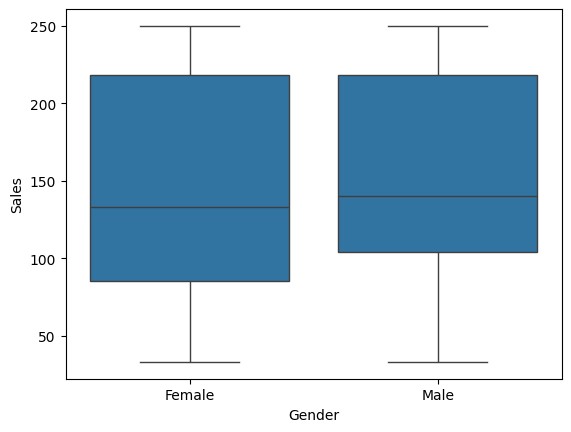

In [37]:
sns.boxplot(x='Gender', y='Sales',data=df)

Null Hypothesis (H0): There is no significant difference in sales between different genders.

Alternative Hypothesis (Ha): There is a significant difference in sales between different genders.

In [38]:
model_gender= ols(formula = "Sales ~ C(Gender)" , data= df).fit()
model_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.008
Date:                Wed, 22 May 2024   Prob (F-statistic):            0.00269
Time:                        15:19:10   Log-Likelihood:            -2.8800e+05
No. Observations:               51282   AIC:                         5.760e+05
Df Residuals:                   51280   BIC:                         5.760e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3660      0.437    346.390      0.000     150.509     152.222
C(Gender)[T.Male]     1.7708      0.590      3.001      0.003       0.614       2.927
==============================================================================
Omnibus:                   377895.856   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4499.574
Skew:                          -0.088   Prob(JB):                         0.00
Kurtosis:                       1.559   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic: F-statistic is used to test the significance of the model. Here, with a p-value of 0.00269, it can be said that there is strong evidence for the significance of the model.

t (t-values): T-values are used to test the significance of coefficients. Here, for the "Gender" variable, the t-value for "Male" is 3.001 with a p-value of 0.003, indicating that the gender variable has a significant effect on sales.

Especially, it can be concluded that the gender variable has a significant effect on sales.

In [39]:
sm.stats.anova_lm(model_gender,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,3.982006e+04,39820.058614,9.007926,0.002689
Residual,51280.0,2.266862e+08,4420.558030,NaN,NaN


In [40]:
sm.stats.anova_lm(model_gender,type=3)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,3.982006e+04,39820.058614,9.007926,0.002689
Residual,51280.0,2.266862e+08,4420.558030,NaN,NaN


In [41]:
sm.stats.anova_lm(model_gender,type=4)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,3.982006e+04,39820.058614,9.007926,0.002689
Residual,51280.0,2.266862e+08,4420.558030,NaN,NaN


For the "Gender" variable, the F-statistic is 9.007926, and the p-value is 0.002689.

The null hypothesis is that the gender variable has no effect on sales.
Since the p-value (0.002689) is less than the significance level (usually 0.05), we reject the null hypothesis.

Therefore, we conclude that there is a significant effect of gender on sales.

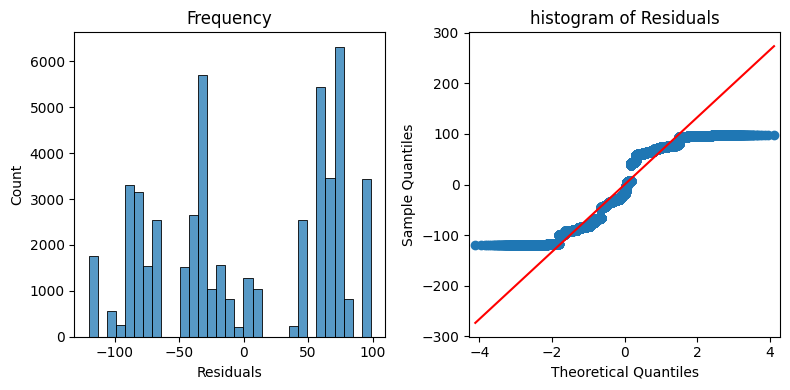

In [42]:
residuals=model_gender.resid
fig, axes =plt.subplots(1,2,figsize=(8,4))
sns.histplot(residuals,ax=axes[0])
axes[0].set_xlabel("Residuals")
axes[0].set_title("Frequency")
sm.qqplot(residuals,line='s',ax=axes[1])
axes[1].set_title("histogram of Residuals")
plt.tight_layout()
plt.show()

For the Anova test to be valid, it is important that the data have a normal distribution because Anova compares the variance between groups and this comparison requires the assumption of normal distribution. If the data are not normally distributed, ANOVA results may be unreliable.

The distribution is not a normal distribution, so we do not continue.

Using permutation testing instead of ANOVA testing can be a valid approach when the data are not normally distributed. Permutation testing is a method of rearranging observations to evaluate the significance of differences between groups.

In [58]:
from sklearn.utils import resample


# Separate data by gender
sales_male = df[df['Gender'] == 'Male']['Sales']
sales_female = df[df['Gender'] == 'Female']['Sales']

## Calculate original difference
original_diff = sales_male.mean() - sales_female.mean()

# permutation test
n_permutations = 10000
diffs = []
combined = np.concatenate([sales_male, sales_female])

for _ in range(n_permutations):
    np.random.shuffle(combined)
    new_sales_male = combined[:len(sales_male)]
    new_sales_female = combined[len(sales_male):]
    diffs.append(new_sales_male.mean() - new_sales_female.mean())

diffs = np.array(diffs)
p_value = np.sum(np.abs(diffs) >= np.abs(original_diff)) / n_permutations
print(f'Permutation test results: original difference={original_diff}, p-value={p_value}')


Permutation test results: original difference=1.7707515172993453, p-value=0.0027


According to the results of the permutation test, when you evaluate the effect of gender on sales, the original difference you get is 1.7707515172993453 and the p-value is 0.0031. P-value plays an important role in determining whether gender has a significant effect on sales.

Orijinal diff (1.7707515172993453):

This value represents the difference between gender (men and women) on average sales. Indicates that male customers' average sales are approximately 1.77 units higher than female customers


P-Value (0.0031):

P-value 0.0031 is the result of permutation testing. This is a measure that evaluates whether the effect of gender on sales is coincidental. If the p-value is generally less than 0.05, the result is considered statistically significant.
In this case, since the p-value is less than 0.05 (0.0031 < 0.05), you can conclude that gender has a significant effect on sales. In other words, gender has a non-random effect on sales.

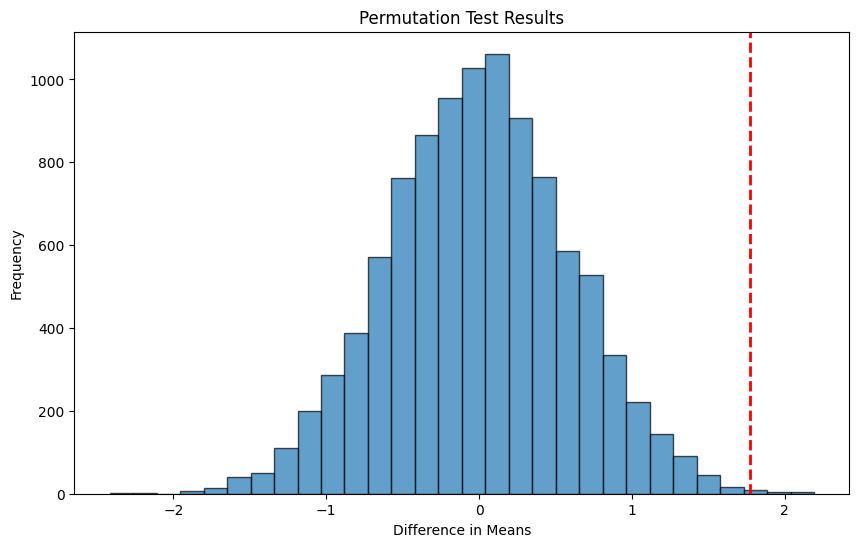

In [44]:
import matplotlib.pyplot as plt

# Histogram of permutation differences
plt.figure(figsize=(10, 6))
plt.hist(diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(original_diff, color='red', linestyle='--', linewidth=2)
plt.title('Permutation Test Results')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

This graph shows the distribution of mean differences in the permutation test and the location of the original difference within this distribution. The fact that the original difference is at the extreme ends of the distribution indicates more clearly that the effect of gender on sales is statistically significant.


Relationship between sales and Product Category

<Axes: xlabel='Sales', ylabel='Product_Category'>

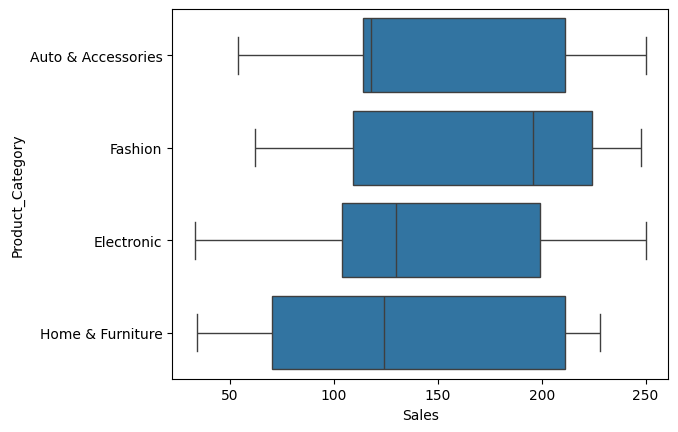

In [45]:
sns.boxplot(x="Sales",y="Product_Category",data=df)

 (H0): There is no significant difference in sales across different product categories.

 (Ha): There is a significant difference in sales across different product categories.

In [46]:
model_category = ols(formula='Sales ~ C(Product_Category)', data=df).fit()
model_category.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1391.
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        15:19:23   Log-Likelihood:            -2.8599e+05
No. Observations:               51282   AIC:                         5.720e+05
Df Residuals:                   51278   BIC:                         5.720e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 146.1493      0.739    197.900      0.000     144.702     147.597
C(Product_Category)[T.Electronic]          -0.0041      1.435     -0.003      0.998      -2.817       2.808
C(Product_Category)[T.Fashion]             23.3085      0.840     27.764      0.000      21.663      24.954
C(Product_Category)[T.Home & Furniture]   -18.1644      0.900    -20.180      0.000     -19.929     -16.400
==============================================================================
Omnibus:                   178789.378   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3607.629
Skew:                          -0.044   Prob(JB):                         0.00
Kurtosis:                       1.704   Cond. No.                         7.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic: Since the p-value associated with the F-statistic is very low (0.00), it can be said that there is strong evidence for the significance of the model.

t (t-values): T-values and p-values are used to evaluate the significance of each coefficient. For example, for the "Fashion" category, the t-value is 27.764 and the p-value is very low (0.000), indicating that this coefficient has a significant effect on sales.

These results indicate that the model is statistically significant overall, and that the coefficient for the "Fashion" category has a significant effect on sales

In [47]:
sm.stats.anova_lm(model_category,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Product_Category),3.0,1.706309e+07,5.687696e+06,1391.059647,0.0
Residual,51278.0,2.096629e+08,4.088751e+03,NaN,NaN


In [48]:
sm.stats.anova_lm(model_category,type=3)

,df,sum_sq,mean_sq,F,PR(>F)
C(Product_Category),3.0,1.706309e+07,5.687696e+06,1391.059647,0.0
Residual,51278.0,2.096629e+08,4.088751e+03,NaN,NaN


As a result, we can conclude that among product categories there are those that have a significant impact on sales and this impact is explained by the model.


In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
tukey_oneway = pairwise_tukeyhsd(endog=df["Sales"], groups = df["Product_Category"], alpha=0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Auto & Accessories,Electronic,-0.0041,1.0,-3.6908,3.6825,False
Auto & Accessories,Fashion,23.3085,0.0,21.1517,25.4654,True
Auto & Accessories,Home & Furniture,-18.1644,0.0,-20.4769,-15.8518,True
Electronic,Fashion,23.3126,0.0,19.9894,26.6359,True
Electronic,Home & Furniture,-18.1602,0.0,-21.5865,-14.7339,True
Fashion,Home & Furniture,-41.4729,0.0,-43.1463,-39.7994,True


"reject": This indicates whether the null hypothesis is rejected. "True" indicates a significant difference between groups.
According to this result:

There is no significant sales difference between the Auto & Accessories and Electronic categories (p-value 1.0, not rejected).

There is a significant sales difference between Auto & Accessories and Fashion categories (p-value 0.0, rejected).

There is a significant sales difference between the Auto & Accessories and Home & Furniture categories (p-value 0.0, rejected).

There is a significant sales difference between the Electronic and Fashion categories (p-value 0.0, rejected).

There is a significant sales difference between the Electronic and Home & Furniture categories (p-value 0.0, rejected).

There is a significant sales difference between the Fashion and Home & Furniture categories (p-value 0.0, rejected).

These results show that there are significant differences in sales between different product categories. In particular, it is seen that the Fashion category has higher sales than other categories and the Home & Furniture category has lower sales than other categories.

Relationship between sales and  Order Priority

<Axes: xlabel='Sales', ylabel='Order_Priority'>

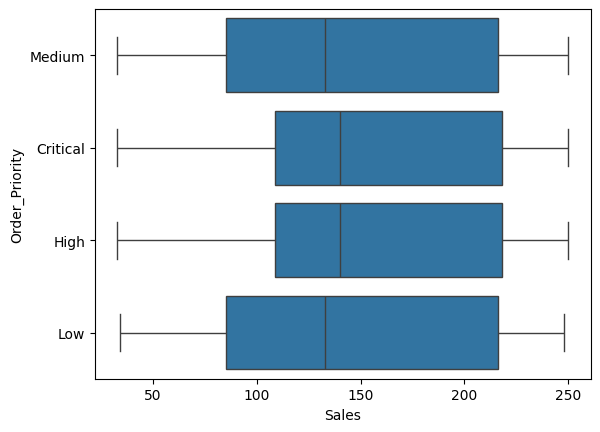

In [51]:
sns.boxplot(x="Sales",y="Order_Priority",data=df)

ANOVA:

H0: There is no significant difference in sales across different order priorities.

H1: There is a significant difference in sales across different order priorities.

In [52]:
model_order_priority = ols(formula='Sales ~ Order_Priority', data=df).fit()
model_order_priority.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.13
Date:                Wed, 22 May 2024   Prob (F-statistic):           7.04e-17
Time:                        15:19:24   Log-Likelihood:            -2.8796e+05
No. Observations:               51282   AIC:                         5.759e+05
Df Residuals:                   51278   BIC:                         5.760e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  157.2795      1.060    148.356      0.000     155.202     159.357
Order_Priority[T.High]      -2.1200      1.187     -1.786      0.074      -4.446       0.206
Order_Priority[T.Low]       -7.6673      1.716     -4.468      0.000     -11.031      -4.304
Order_Priority[T.Medium]    -6.8634      1.129     -6.081      0.000      -9.076      -4.651
==============================================================================
Omnibus:                   374615.198   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4509.807
Skew:                          -0.086   Prob(JB):                         0.00
Kurtosis:                       1.557   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for "Order_Priority[T.Low]" is given as -7.6673. This shows that low priority orders reduce average sales by 7.6673 units.


The R-squared value is given as 0.002 and the adjusted R-squared value is 0.001.

 These values ​​indicate that the independent variables in the model explain only a very small portion of the variance in sales. In other words, the explanatory power of the order priority variable on sales is very low.


As a result, it can be said that the order priority variable has an effect on sales, but this effect has low explanatory power and the model is generally significant. In particular, low priority orders have been observed to have a significant impact on average sales.


In [53]:
sm.stats.anova_lm(model_order_priority,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
Order_Priority,3.0,3.460220e+05,115340.673511,26.126154,7.038482e-17
Residual,51278.0,2.263800e+08,4414.759035,NaN,NaN


In [54]:
model_product = ols(formula='Sales ~ C(Product)', data=df).fit()
model_product.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.147e+27
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        15:19:25   Log-Likelihood:             1.1800e+06
No. Observations:               51282   AIC:                        -2.360e+06
Df Residuals:                   51240   BIC:                        -2.360e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              250.0000   1.65e-12   1.51e+14      0.000     250.000     250.000
C(Product)[T.Bed Sheets]               -39.0000   1.77e-12  -2.21e+13      0.000     -39.000     -39.000
C(Product)[T.Beds]                    -172.0000   1.77e-12  -9.73e+13      0.000    -172.000    -172.000
C(Product)[T.Bike Tyres]              -178.0000   1.86e-12  -9.56e+13      0.000    -178.000    -178.000
C(Product)[T.Car & Bike Care]         -132.0000   1.86e-12  -7.09e+13      0.000    -132.000    -132.000
C(Product)[T.Car Body Covers]         -133.0000   1.86e-12  -7.14e+13      0.000    -133.000    -133.000
C(Product)[T.Car Mat]                 -196.0000   1.86e-12  -1.05e+14      0.000    -196.000    -196.000
C(Product)[T.Car Media Players]       -110.0000   1.86e-12  -5.91e+13      0.000    -110.000    -110.000
C(Product)[T.Car Pillow & Neck Rest]   -19.0000   1.86e-12  -1.02e+13      0.000     -19.000     -19.000
C(Product)[T.Car Seat Covers]         -136.0000   1.86e-12   -7.3e+13      0.000    -136.000    -136.000
C(Product)[T.Car Speakers]             -39.0000   1.86e-12  -2.09e+13      0.000     -39.000     -39.000
C(Product)[T.Casula Shoes]            -128.0000   1.73e-12   -7.4e+13      0.000    -128.000    -128.000
C(Product)[T.Curtains]                -216.0000   1.77e-12  -1.22e+14      0.000    -216.000    -216.000
C(Product)[T.Dinner Crockery]         -117.0000   1.77e-12  -6.62e+13      0.000    -117.000    -117.000
C(Product)[T.Dinning Tables]          -131.0000   1.77e-12  -7.41e+13      0.000    -131.000    -131.000
C(Product)[T.Fans]                    -101.0000   2.34e-12  -4.32e+13      0.000    -101.000    -101.000
C(Product)[T.Formal Shoes]             -37.0000   1.73e-12  -2.14e+13      0.000     -37.000     -37.000
C(Product)[T.Fossil Watch]             -91.0000   1.73e-12  -5.26e+13      0.000     -91.000     -91.000
C(Product)[T.Iron]                     -28.0000   2.34e-12   -1.2e+13      0.000     -28.000     -28.000
C(Product)[T.Jeans]                    -32.0000   1.73e-12  -1.85e+13      0.000     -32.000     -32.000
C(Product)[T.Keyboard]                -217.0000   2.34e-12  -9.28e+13      0.000    -217.000    -217.000
C(Product)[T.LCD]                     -185.0000   2.33e-12  -7.94e+13      0.000    -185.000    -185.000
C(Product)[T.LED]                      -58.0000   2.33e-12  -2.49e+13      0.000     -58.000     -58.000
C(Product)[T.Mixer/Juicer]            -167.0000   2.33e-12  -7.16e+13      0.000    -167.000    -167.000
C(Product)[T.Mouse]                   -139.0000   2.34e-12  -5.94e+13      0.000    -139.000    -139.000
C(Product)[T.Running Shoes]            -26.0000   1.73e-12   -1.5e+13      0.000     -26.000     -26.000
C(Product)[T.Samsung Mobile]          

The R-squared value of the model is given as 1.000, which indicates that the model explains all of the variance explained by the independent variables. However, this degree of perfect fit is often unrealistic and can often imply some form of overfit to the data.

The coefficients for each product category represent the impact of that product category on average sales. For example, the coefficient for the "Bed Sheets" category is -39.0000, indicating that this product category reduced average sales by 39 units.

In [55]:
sm.stats.anova_lm(model_product,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Product),41.0,2.267260e+08,5.529903e+06,9.146832e+27,0.0
Residual,51240.0,3.097818e-17,6.045703e-22,NaN,NaN


In [59]:
data_product = df[['Product', 'Sales']]

# Calculate the mean sales for each category
category_means_product = data_product.groupby('Product')['Sales'].mean()

# Calculate the original variance between categoriesn
original_var = np.var(category_means_product)
print(f"Original variance: {original_var}")
# Permutation test parameters
n_permutations = 10000  # Permütasyon sayısı
permuted_vars = []

for _ in range(n_permutations):
    # Resample the sales data to shuffle the categories randomly
    permuted_sales = resample(df['Sales'], replace=False)
    
    # Calculate the mean sales for the permuted categories
    permuted_means = data_product.assign(Sales=permuted_sales).groupby('Product')['Sales'].mean()
    
    # Calculate the variance for the permuted categories
    permuted_vars.append(np.var(permuted_means))

# Evaluate the permutation test result
p_value = np.mean(np.array(permuted_vars) >= original_var)
print(f"Permutation test p-value: {p_value}")

Original variance: 4452.09126984127
Permutation test p-value: 1.0


The p-value was calculated as 1.0. This shows that the original variance as a result of the permutation test is greater than all of the variances observed under the permutations. That is, in this case, it means that the variance of product categories on sales is not statistically significantly different.

ANALYSIS RESULTS

1)Sales and Profit: Total sales value was determined as 7812164.0 and Total total profit was determined as 3610344.900.

2)Monthly Total Sales and Profit Trend: Monthly total sales and profit sales were mostly observed between November.
The least sales and profits were observed between February.

3)Total Sales and Profit by Product: In the total sales and profit analysis by product, the most sales and profit were obtained from the t-shirts product. sales: 578336.0 and profit: 340720.6 The least sales and profit were obtained from the keyboard product. sales: 7293.0 profit: 3292.4

4)Total Sales and Profit by Product Category: In the total sales and profit analysis by product category, the most profit and sales fashion was obtained.sales:4345914.0 The least profit and sales were determined as the recruitment electronics category.sales:394738.0

5)Customer Segmentation: [Results from customer segmentation analysis] were found in the segmentation analysis based on gender, device type and customer login type.


6)Payment Method Distribution: Most payment types via credit card.

7)Customer Login Type Distribution: In the current analysis of customer login, 92.9% logged in via web. 7.1% logged in via mobile.

8)ANOVA and permutation tests were conducted to analyze whether sales were significant by device type, payment method, gender, product category, and order priority.
The test revealed differences in sales by gender. It has been observed that men make more sales on average than women. Based on this, a marketing system specific to men and women can be developed.